# Filtering

In [1]:
# 0) import our needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

## 1- Read our images

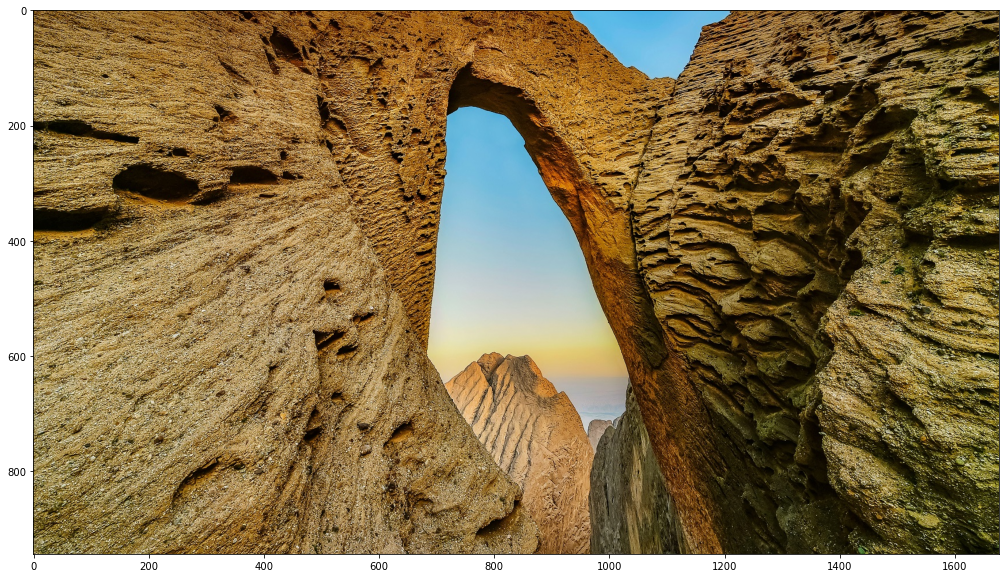

In [24]:
image_original = cv2.imread('./HighArchChina.jpg')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.show()

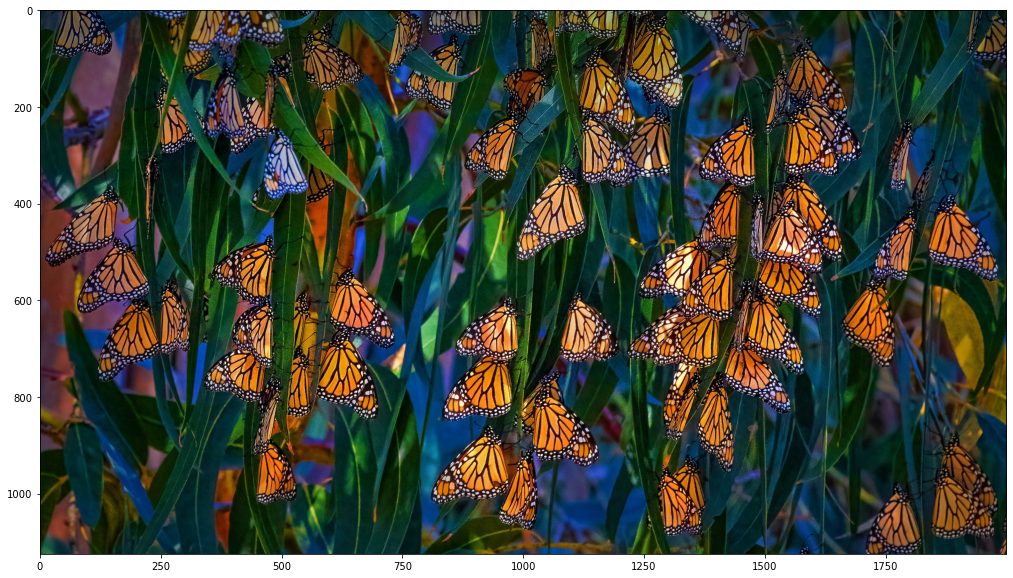

In [105]:
image_original = cv2.imread('./MonarchPismo.jpg')
image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.show()

## 2- Define our box filter
### smoothing filter

In [5]:
kernel_width = 5
kernel = np.ones(shape=(kernel_width, kernel_width)) / kernel_width**2
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


### edge detection

In [116]:
kernel = np.array([
    [-1, -1, -1], 
    [-1, 8, -1], 
    [-1, -1, -1]
])
print(kernel)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


### emboss filter

In [114]:
kernel = np.array([
    [-2, -1, 0], 
    [-1, 1, 1], 
    [0, 1, 2]
])
print(kernel)

[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]


### horizontal sobel filter

In [8]:
kernel = np.array([
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
])
print(kernel)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


### gaussian filter 
\begin{align}
    y = e^{-\frac{(x-x_0)^2+(y-y_0)^2}{2\sigma^2}}
\end{align}

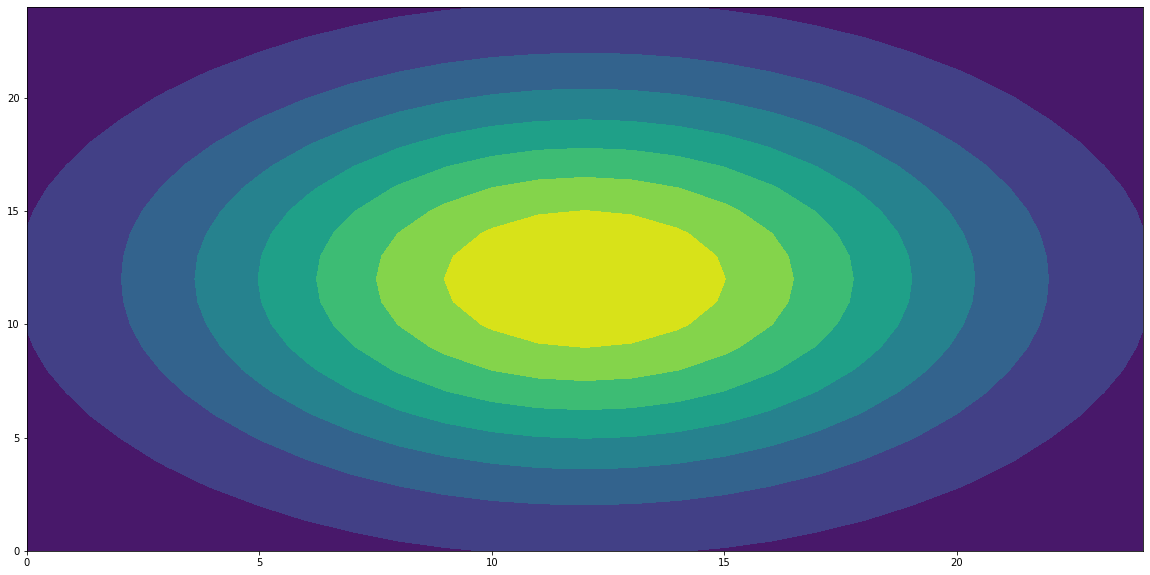

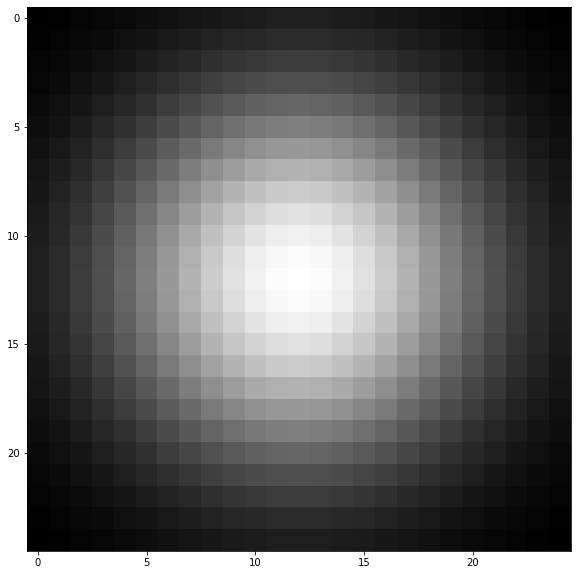

In [106]:
kernel_width = 25
sigma = np.floor(kernel_width / 4)
miu = (kernel_width - 1) / 2
x_axis, y_axis = np.meshgrid(range(kernel_width), range(kernel_width))
kernel = np.exp(-((x_axis - miu) ** 2 + (y_axis - miu) ** 2) / (2 * sigma ** 2))
kernel = kernel / np.sum(kernel) # Normalizing our filter 

plt.contourf(x_axis, y_axis, kernel)

plt.figure()
plt.imshow(kernel, cmap='gray')
plt.show()

### sharpener filter

In [112]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1], 
    [0, -1, 0]
])
print(kernel)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


## 3- Apply filters

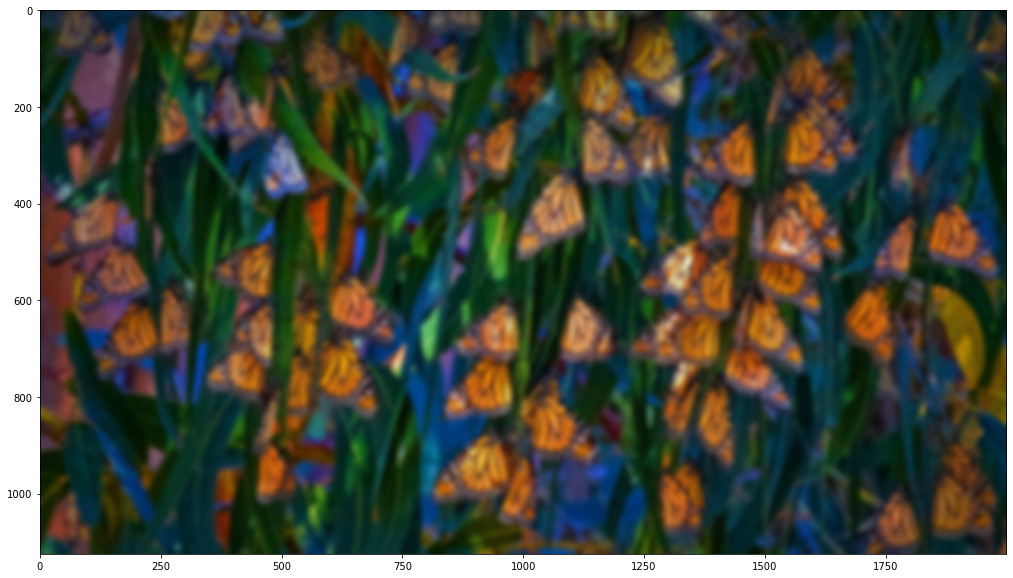

In [107]:
blured_image = cv2.filter2D(src=image_original.copy(), ddepth=-1, kernel=kernel).astype(np.uint8)
plt.imshow(blured_image)
plt.show()

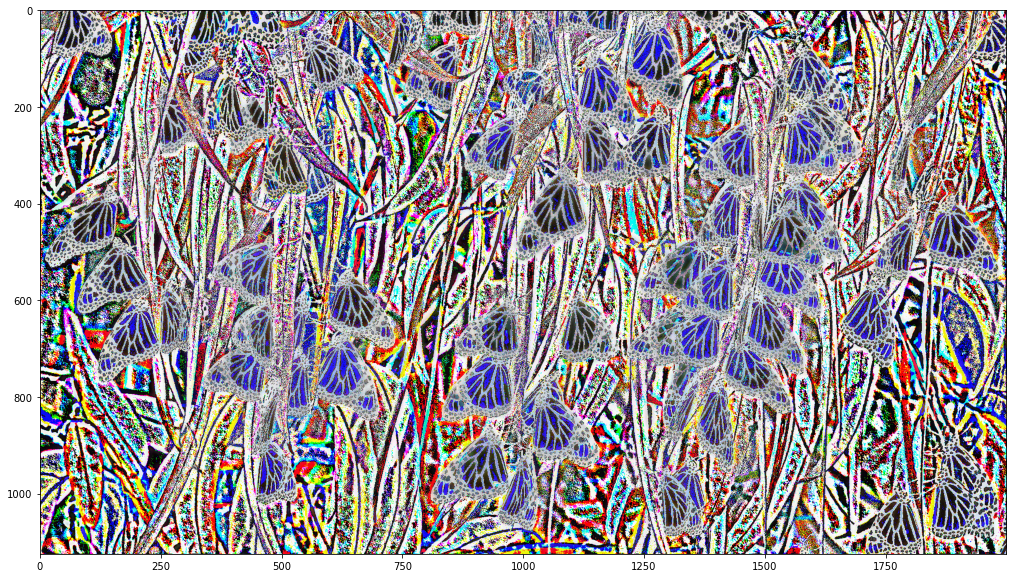

In [108]:
unsharp_mask = image_original.copy() - blured_image.copy()
plt.imshow(unsharp_mask)
plt.show()

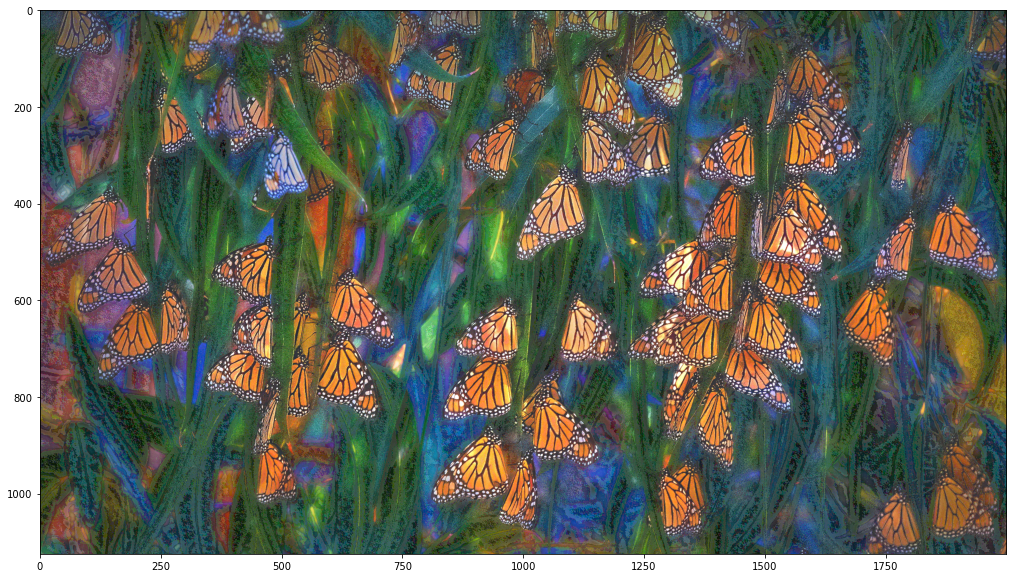

In [109]:
a = 0.22
sharpened_image = image_original.copy() + a * unsharp_mask
sharpened_image[sharpened_image < 0] = 0 
sharpened_image[sharpened_image > 255] = 255
sharpened_image = sharpened_image.astype(np.uint8)
plt.imshow(sharpened_image)
plt.show()

## Image Sampling

(141, 250, 3)


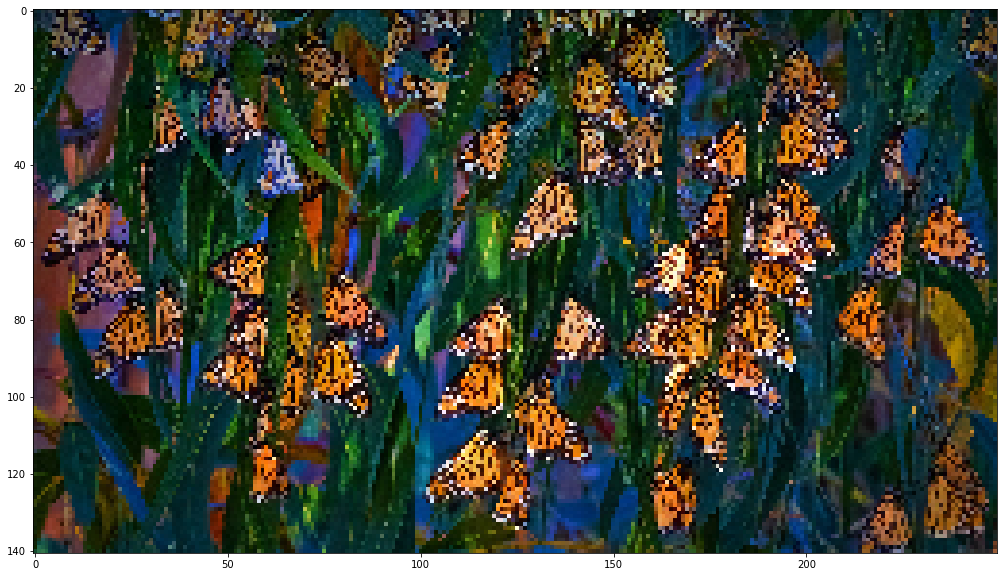

In [118]:
sampled_image = image_original[::8, ::8, :3]
print(sampled_image.shape)
plt.imshow(sampled_image)
plt.show()

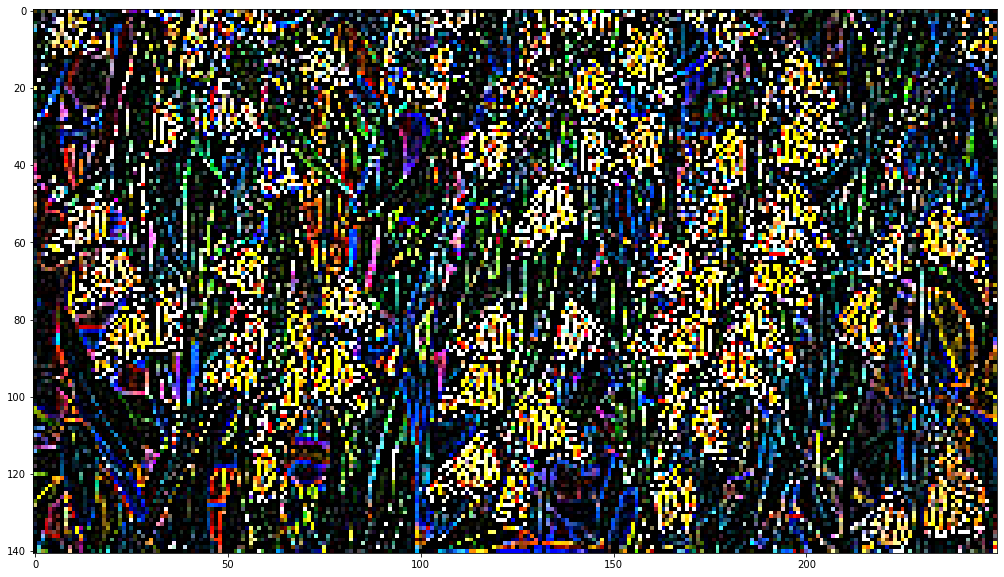

In [119]:
blured_image = cv2.filter2D(src=sampled_image, ddepth=-1, kernel=kernel)
plt.imshow(blured_image)
plt.show()